Saad Mufti

CS 539 - HW 2

# **Conceptual and Theoretical Questions**

### **Q1**
To minimize the error function, take the derivative with respect to $\textbf{w}$  and set it to 0:

$$ 0=-\frac{1}{2}\sum_{n=1}^{N}{2 \cdot r_n\left(t_n - w^T \cdot \phi(x_n) \right)} \phi(x_n)^T$$

$$ 0 = -\sum_{n=1}^{N}{r_n t_n \phi(x_n)^T - r_n w \phi(x_n) \phi(x_n)^T} $$

$$ 0 = \sum_{n=1}^{N}{r_n t_n \phi(x_n)^T} - w\sum_{n=1}^{N}{r_n \phi(x_n) \phi(x_n)^T} $$ 

$$ w \sum_{n=1}^{N}{r_n \phi(x_n) \phi(x_n)^T} = \sum_{n=1}^{N}{r_n t_n \phi(x_n)^T}$$

Take the inverse to isolate $w$
$$ w = \left(\sum_{n=1}^{N}{r_n \phi(x_n) \phi(x_n)^T}\right)^{-1} \sum_{n=1}^{N}{r_n t_n \phi(x_n)^T} $$

Because $r_n$ is defined as the inverse of the variance of the nth data point, a large $r_n$ indicates a small variance, indicating the high confidence in that data. A small weight would then of course indicate low certainty in that data with a high variance. 

Alternatively, the weight $r_n$ can simply be seen as how many times the nth data point has been observed, which is in line with the constraint $r_n > 0$, but is more fitting for integral values of $r_n$.


### **Q2**
Using Bayes' rule, the relationship between the prior, likelihood, and posterior distributions is known to be:
$$ p(\textbf{w}, \beta | \textbf{t}) \propto p(\textbf{w}, \beta) \cdot p(\textbf{t} | \textbf{X}, w, \beta)$$

![Ahhhhhhh](Q2_Work.png)
Work is shown above

### **Q3**
If a dataset is lineary separable, then its classes can be exactly distinguished with a linear decision boundary. The probability of a class $C_1$ in a dataset using logistic regression is 

$$ p(C_1|\phi) = \sigma(w^T\phi)$$

Because the dataset is linearly separable, data of one class $x_a$ may fall one side of the decision boundary with $w^T \phi(x_a) > 0$, and another class denoted by $x_b$ may be found on the other side $w^T \phi(x_b) < 0$. 

If $|w| \rightarrow \infty$, then the sigmoid function of the posterior for class a $\sigma(w^T\phi) \rightarrow 1$, which thus maximizes the likelihood. This would also be true for finding class b since $\sigma(x)=1-\sigma(-x)$

### **Q4**
We have 
$$ H=\nabla \nabla E(w) = \sum_{n=1}^{N}{y_n(1-y_n) \phi_n \phi_n^T = \Phi^T R \Phi}\tag{4.97, Bishop}$$

For a symmetric matrix $A$ to be positive definite, then any real valued vector $z$ can be multiplied by $A$ to get all entries being positive:
$$z^T A z  = A_{ij} > 0 $$

Begin by multiplying the double gradient by z as above to prove it is positive definite:

$$ z^T\sum_{n=1}^{N}{(y_n(1-y_n) \phi_n \phi_n^T)}z $$
$$ \sum_{n=1}^{N}{y_n(1-y_n) z^T\phi_n \phi_n^Tz}$$

Notice that $z^T\phi_n = (\phi_n^T z)^T$, which is also a dot product (scalar quantity), which allows us to square that term, making it always greater than or equal to zero:

$$\sum_{n=1}^{N}{y_n(1-y_n) (\phi_n^Tz)^2}$$

Now, because $1 > y_n > 0$, since that is the range of the sigmoid function in logistic regression, then $y_n(1-y_n) > 0$ as well, meaning the terms are all positive.

As for proving that the function is concave, it has just been proven that the double gradient is always greater than 0, which ensures $\nabla \nabla E(w) > 0$, which means it is concave by definition.


### **Q5**
#### **Part a**
The PMF of the exponential distribution family can be written as 
$$ p(x|\eta)=h(x)g(\eta)\exp{\left\{\eta^{T}y(x)\right\}} \tag{2.194, Bishop} $$


The functions correspond to the following:
$$ h(x) = x^{\alpha - 1}$$
$$y(x) = x$$
$$\eta ^T = -\beta$$
$$g(\eta)=g(\beta) = \beta^{\alpha}$$


#### **Part b**
In order to find the maximum likelihood, take the log for convenience:

$$ \log{(L)} = \sum^N{-\log(T(v)) + v\log(\frac{x t_i}{y_i}) - \log y_i - \frac{v t_i}{y_i}}$$

Expanding and removing constant terms:

$$-(v+1) \sum^N{\log y_i - v \sum^N{\frac{t_i}{y_i}}}$$

To find the gradient ascent steps, take the gradient with respect to $w_0$ and $w_1$:

$$ \frac{\partial \log(L)}{\partial w_0} = \sum^N{-(v+1) + v t_i y_i}$$

$$ \frac{\partial \log(L)}{\partial w_1} = \sum^N{x_i(-(v+1)+v t_i y_i)}$$

This leads to the following update rules:

$$w_0^{(r+1)} \leftarrow w_0^r + \propto \nabla w_0^r$$
$$w_1^{(r+1)} \leftarrow w_1^r + \propto \nabla w_1^r$$

To determine if the likelihood is concave or not, take the gradient with respect to $w_0$ and $w_1$:



### **Q6**
#### **Part a**
The likelihood function would be the probability of observing each $t_n$, given the parameters $w$ and $\phi$, over a normal distribution, so that:

$$ L(t_1, t_2, ... t_n | w, \phi) = \prod^N_{i=1}{N(t_i | w^T\phi(x), \sigma \epsilon)}$$

The Laplacian prior is defined as 

$$P(w | b) = \frac{1}{2b}\exp{(-\frac{|w|}{b})}$$

Multiply the prior and likelihood:

$$ L(w|D, b) \propto L(t_1, t_2, ... t_n | w, \phi) \cdot \frac{1}{2b} \exp(-\frac{|w|}{2b})$$

Which follows the same general form as the lasso regularization formula:

$$-\frac{1}{2}\sum_i{t_i - w^T \phi(x_i)^2} - \lambda\sum_j{|w_i|}$$


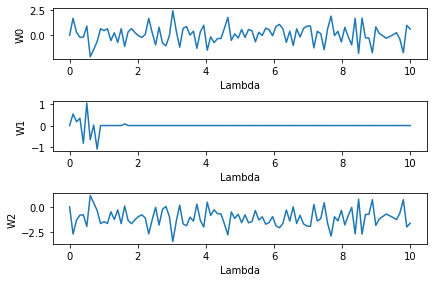

In [232]:
# Part b
import numpy as np
import matplotlib.pyplot as plt

mu_ek = 0
sigma_ek = 0.1
ek = np.random.normal(loc=mu_ek, scale=np.sqrt(sigma_ek), size=(100,1))

mu_x = 0
sigma_x = 1
x_i = np.random.normal(loc=mu_x, scale=np.sqrt(sigma_x), size=(100,1))
t_i = 1 + (0.01 * x_i) - 2 *  np.multiply(x_i, x_i) + ek

lambda_1 = np.linspace(0, 10, num=100)
eps = 0.0001
phi_x = np.concatenate([np.ones((100, 1)), x_i, np.multiply(x_i,  x_i)], axis=1)
alpha = 1e-4
ws = np.zeros((100, 3))
for l in np.arange(1, 100, step=1):
    t_lambda = lambda_1[l - 1]
    w_r = np.random.randn(3, 1)
    for iter in np.arange(1, 10000, step=1):
        err = t_i - np.matmul(phi_x, w_r) # 100, 1
        dw_0 = sum(err)
        
        d1 = 1 / max(eps, abs(w_r[1]))
        dw_1 = np.sum(phi_x[:, 1].T *err) - t_lambda * w_r[1] * d1

        d2 = 1 / max(eps, abs(w_r[2]))
        dw_2 = np.sum(phi_x[:, 2].T * err) - t_lambda * w_r[2] * d2

        w_r[0] = w_r[0] + alpha * dw_0
        w_r[1] = w_r[1] + alpha * dw_1
        w_r[2] = w_r[2] + alpha * dw_2
    ws[l,:] = w_r.reshape((3,))

fig_6, ax_6 = plt.subplots(3, 1)
ax_6[0].plot(lambda_1, ws[:, 0])
ax_6[0].set_ylabel("W0")
ax_6[0].set_xlabel("Lambda")

ax_6[1].plot(lambda_1, ws[:, 1])
ax_6[1].set_ylabel("W1")
ax_6[1].set_xlabel("Lambda")

ax_6[2].plot(lambda_1, ws[:, 2])
ax_6[2].set_ylabel("W2")
ax_6[2].set_xlabel("Lambda")
fig_6.tight_layout()

# **Application Questions**

In [226]:
# Imports

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression, BayesianRidge
from sklearn.metrics import mean_squared_error, RocCurveDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from scipy import stats
import pymc3 as pm

### **Linear Regression Problem (25 pts)**

In [3]:
# Dataset init

dfr = pd.read_excel("Real estate valuation data set.xlsx")
dfr.rename(columns={
    "X1 transaction date": "X1",
    "X2 house age": "X2",
    "X3 distance to the nearest MRT station": "X3",
    "X4 number of convenience stores": "X4",
    "X5 latitude": "X5",
    "X6 longitude": "X6",
    "Y house price of unit area": "Y"
}, inplace=True)
print(f"Zeroing X1, transaction date, at {min(dfr['X1'])}")
dfr["X1"] = dfr["X1"] - min(dfr["X1"])
dfr.head()

Zeroing X1, transaction date, at 2012.6666667


,No,X1,X2,X3,X4,X5,X6,Y
0,1,0.250000,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,0.250000,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,0.916667,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,0.833333,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,0.166667,5.0,390.56840,5,24.97937,121.54245,43.1


C:\Users\SAADMU~1\AppData\Local\Temp/ipykernel_28320/3992793283.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dfr.drop("No", axis=1).hist(ax=ax_hist, bins="auto")


Text(0.5, 0.98, 'Scatter plots for predictors')

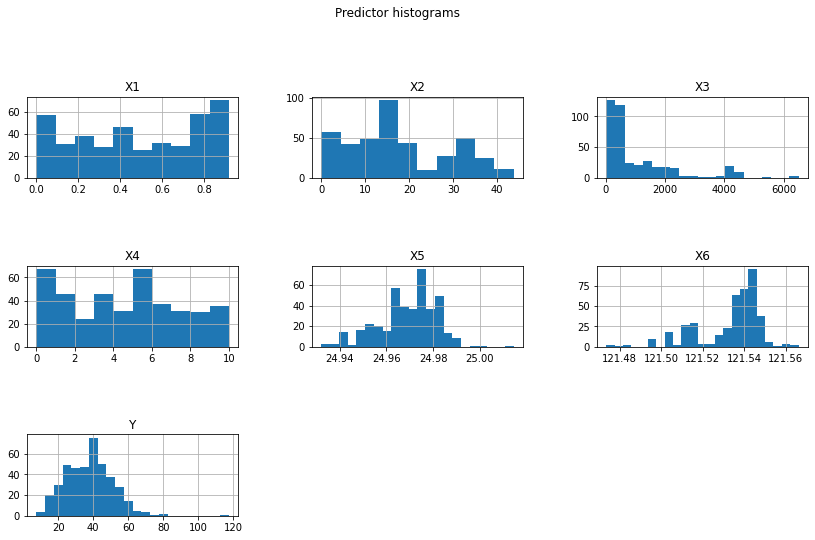

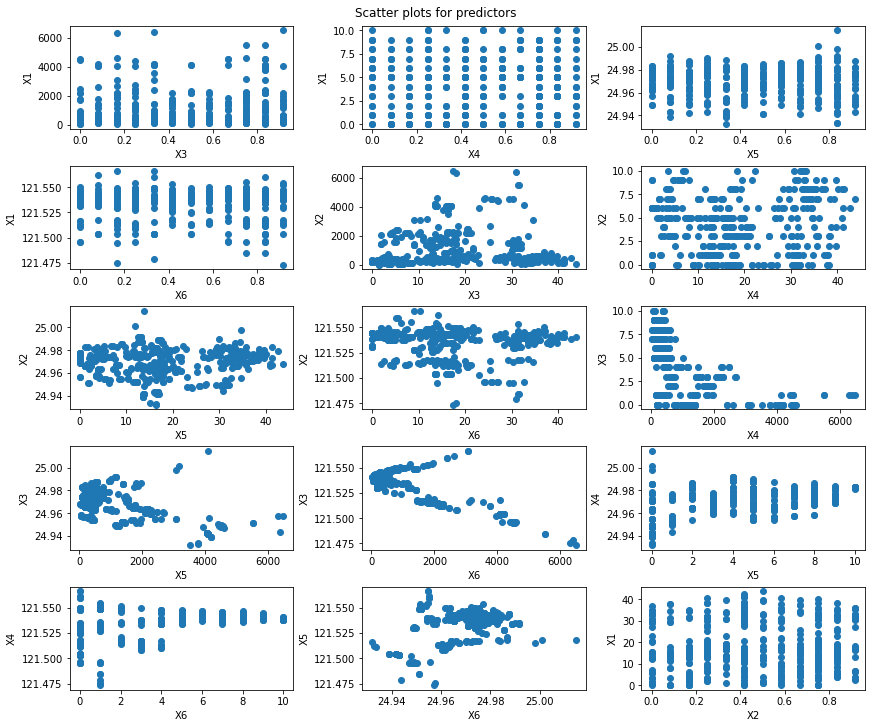

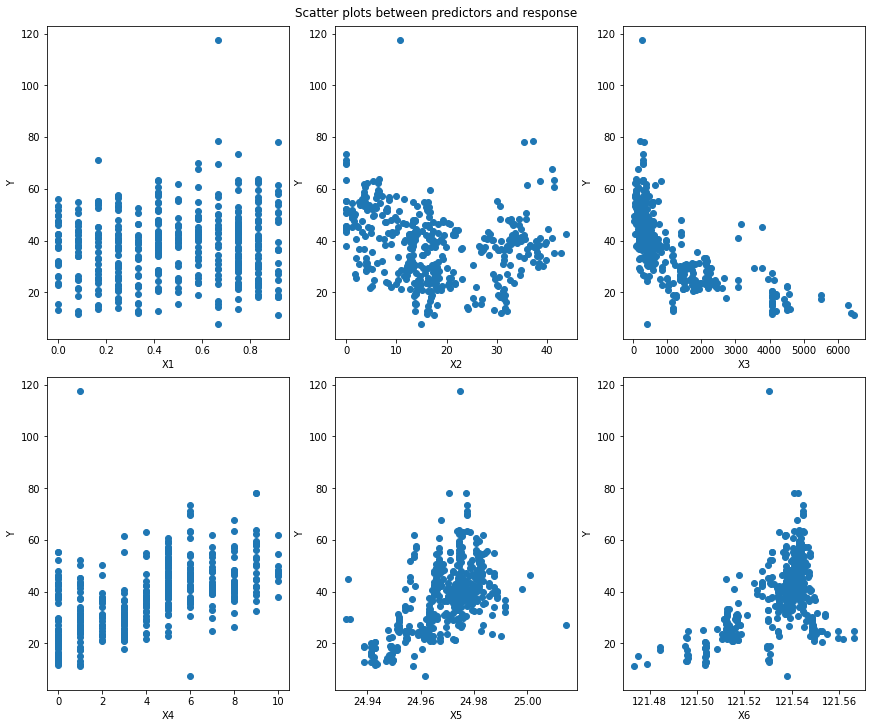

In [4]:
# 1. Visualization

figure_hist, ax_hist = plt.subplots()
dfr.drop("No", axis=1).hist(ax=ax_hist, bins="auto")
figure_hist.suptitle("Predictor histograms")
figure_hist.tight_layout()
figure_hist.set_size_inches(12, 8)

fig_sc_preds, ax_preds = plt.subplots(nrows=5, ncols=3, figsize=(12, 10), constrained_layout=True)
fig_sc_resp, ax_resp = plt.subplots(nrows=2, ncols=3, figsize=(12, 10), constrained_layout=True)
combs = list(combinations(range(1,7), 2))

def lin_to_mat(cols, x):
    return (x // cols, x % cols)

for i in range(1, 7):
    ax_resp[lin_to_mat(3, i - 1)].scatter(dfr[f"X{i}"], dfr["Y"])
    ax_resp[lin_to_mat(3, i - 1)].set_xlabel(f"X{i}")
    ax_resp[lin_to_mat(3, i - 1)].set_ylabel("Y")
fig_sc_resp.suptitle("Scatter plots between predictors and response")

for i in range(len(combs)):
    ax_preds[lin_to_mat(3, i - 1)].scatter(dfr[f"X{combs[i][0]}"], dfr[f"X{combs[i][1]}"])
    ax_preds[lin_to_mat(3, i - 1)].set_ylabel(f"X{combs[i][0]}")
    ax_preds[lin_to_mat(3, i - 1)].set_xlabel(f"X{combs[i][1]}")
fig_sc_preds.suptitle("Scatter plots for predictors")

_="""
There appear to be some data points that differ from the rest of the predictor data, such as in X3 and Y. X3 and X5 appear to have the strongest correlation with Y.
"""

X1 weight: 5.149017210936201
X2 weight: -0.2696967345199864
X3 weight: -0.004487508250365868
X4 weight: 1.1333249810148465
X5 weight: 225.47014318107793
X6 weight: -12.42906116553292

RMSE:  8.782312975361108
414


Text(0.5, 0, 'Transaction date (X1, Years since August 2012)')

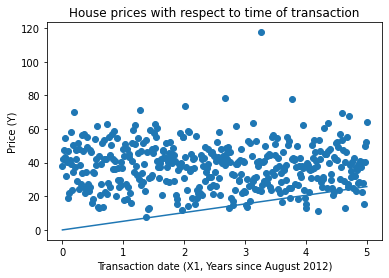

In [212]:
# 2. Linear Regression Model
pred_names = ["X1", "X2", "X3", "X4", "X5", "X6"]
predictors = dfr[pred_names]

lin_model = LinearRegression().fit(X=predictors, y=dfr["Y"])
lin_y_preds = lin_model.predict(predictors)

def show_weights(names, weights):
    print("\n".join("{} weight: {}".format(*i) for i in list(zip(names, weights))))

show_weights(pred_names, lin_model.coef_)
print("\nRMSE: ", mean_squared_error(dfr["Y"], lin_y_preds, squared=False))

fig_time, ax_time = plt.subplots()
tt = np.linspace(0,5, num=414) ## Transaction times

ax_time.plot(tt, np.multiply(tt, lin_model.coef_[0]))
print(len(dfr["Y"]))
ax_time.scatter(tt, dfr["Y"])
ax_time.set_title("House prices with respect to time of transaction")
ax_time.set_ylabel("Price (Y)")
ax_time.set_xlabel("Transaction date (X1, Years since August 2012)")

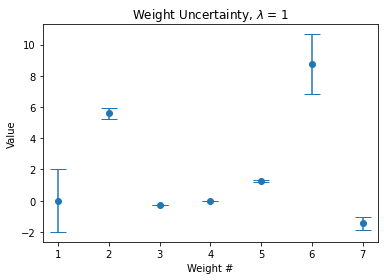

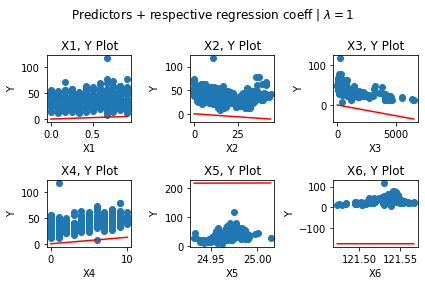

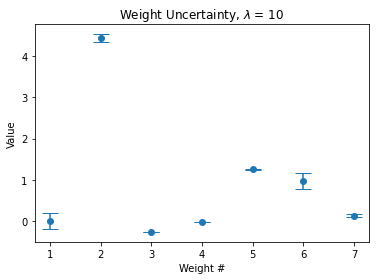

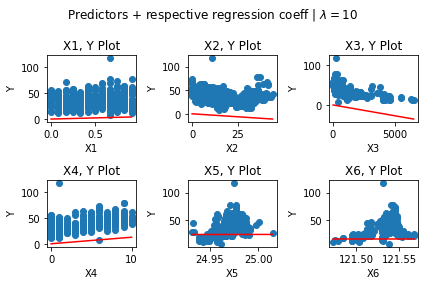

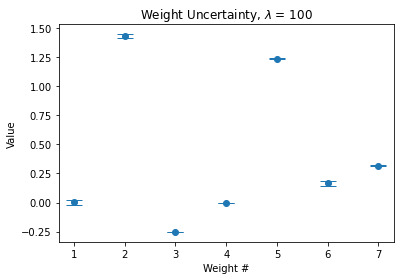

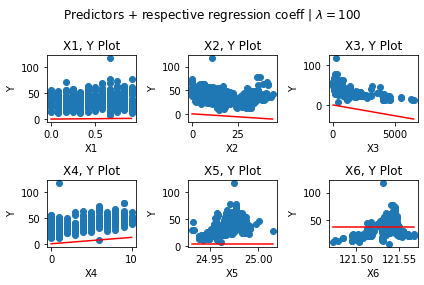

In [166]:
# 3. Bayesian Linear Regression Model

# x must be a dataframe
def bayesian_reg(x, t, lambda_reg, basis=lambda v: v, basis_params=None):
    alpha = lambda_reg ** 2
    beta = lambda_reg
    def posterior(phi, t):
        # Prior here is defined as N(w|mu=0, cov=a^-1 * I)
        cov_n = np.linalg.pinv(alpha * np.eye(phi.shape[1]) + beta * phi.T.dot(phi))
        m_n = beta * cov_n.dot(phi.T).dot(t)
        return m_n, cov_n

    def predict_dist(phi, m_n, cov_n, beta):
        cov = beta ** -1 + np.sum(phi.dot(cov_n) * phi, axis=1)
        mu = phi.dot(m_n)
        return mu, cov

    def design_mat(x, basis):
        if(basis_params == None):
            return np.concatenate([np.ones((x.shape[0], 1)), basis(x)], axis=1)
        else: 
            x.apply(lambda row: basis(row, basis_params[row.name]), axis=1)
            return np.concatenate(
                [
                    np.ones((x.shape[0], 1)), 
                    x.to_numpy()
                ], axis=1)
    
    phi = design_mat(x, basis)
    # print("Design mat", phi)

    m_n, cov_n = posterior(phi, t)
    y, var = predict_dist(phi, m_n, cov_n, beta)

    # Frequentist approach uses penrose pseudo-inverse
    # weights = np.matmul(np.linalg.pinv(phi), t)

    # show_weights(["B0"] + pred_names, m_n)
    # print(np.diag(cov_n))
    _, ax_weights = plt.subplots()
    weight_x = np.linspace(1, len(m_n), len(m_n))
    ax_weights.errorbar(x=weight_x, y=m_n, yerr=2*np.sqrt(np.diag(cov_n)), ls="none", capsize=8)
    ax_weights.scatter(x=weight_x, y=m_n)
    ax_weights.set_title(f"Weight Uncertainty, $\lambda$ = {lambda_reg}")
    ax_weights.set_xlabel("Weight #")
    ax_weights.set_ylabel("Value")

    cols = min(3, x.shape[1])
    rows = x.shape[1] // cols
    fig_bay, ax_bay = plt.subplots(rows, cols)
    for i, ax in enumerate(ax_bay.ravel()):
        names = list(x.keys())
        data = x[names[i]]
        ax.scatter(data, dfr["Y"])
        x_test = np.linspace(min(data), max(data), 200)
        ax.plot(x_test, (m_n[i + 1] * x_test) + m_n[0], "r")
        ax.set_title(f"X{i + 1}, Y Plot")
        ax.set_xlabel(f"X{i + 1}")
        ax.set_ylabel("Y")
    fig_bay.suptitle(f"Predictors + respective regression coeff | $\lambda={lambda_reg}$")
    fig_bay.tight_layout()
    
    

bayesian_reg(predictors, dfr["Y"], lambda_reg=1)
bayesian_reg(predictors, dfr["Y"], lambda_reg=10)
bayesian_reg(predictors, dfr["Y"], lambda_reg=100)

Predicted vals [46.7630763  47.4763383  43.41025225 43.3421758  45.82610157 32.89297689
 39.38533815 44.22960541  6.53244148 32.97500145 33.74046204 52.3202548
 43.32659262 29.11549027 38.83715658 34.14562837 49.14619003 38.05136342
 47.00708079 50.97572461 33.59735344 47.91659968 33.33963169 47.74444785
 35.61204881 30.29982552 46.20293543 45.44622948 40.70256166 45.16778658
 12.3015666  39.8711181  32.2296225  44.8448585  46.55489837 17.75111375
 31.33879059 34.21990148 46.31269166 43.85573832 17.39993207 17.09279735
 37.80002021 38.90596154 45.0350606  41.13296824 46.46062357 34.94075528
 12.1817702  11.98299124 40.25769979 27.11055479 31.46724917 43.38762992
 43.81270032 28.93480615 42.80865104 50.49517928 12.43840919 44.25349996
 32.69475097 48.20819292 30.56361595 45.06009913 33.81370007 42.55405151
 49.24240696 47.07866001 40.72111998 42.99787221 52.44936864 34.63245055
 42.92481226 17.48600799 51.43845761 34.41709176 35.07581819 29.61796968
 33.12331044 32.27805261 42.68847776 

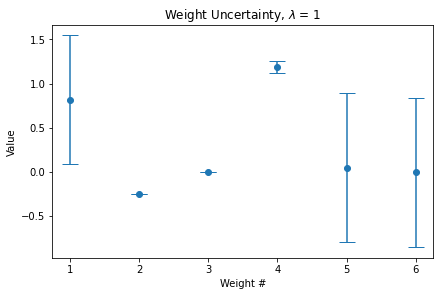

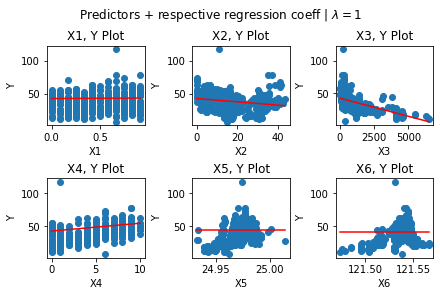

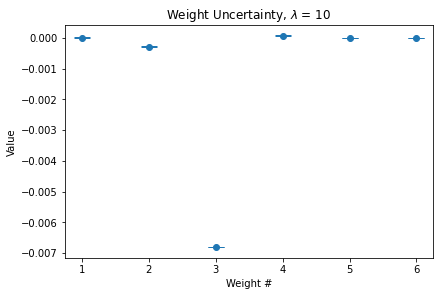

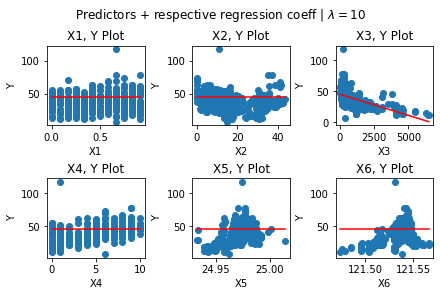

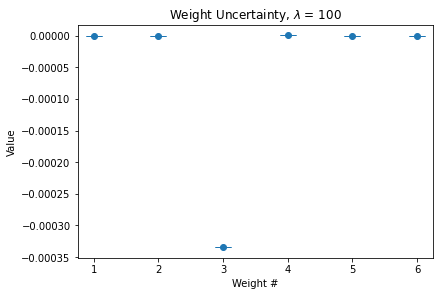

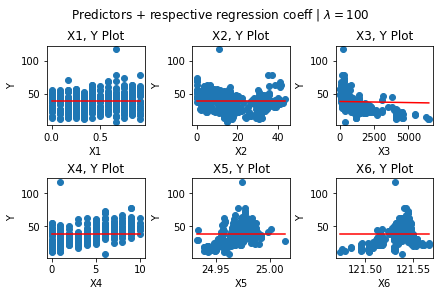

In [335]:
# 3. Bayesian Linear Regression, SKLearn 
# I attempted to perform this problem with a custom made solution, but the results were poor
def bay_ridge(x, t, lambda_reg, basis=lambda v: v, basis_params=None):
    model = BayesianRidge(lambda_1=lambda_reg)
    design_mat = x.copy()
    
    if basis_params is not None:
        for c in x.columns:
            for i in basis_params:
                design_mat[f"{c}.mu{i}"] = basis(x[c], i)
    # print(design_mat.shape)
    model.fit(X=design_mat, y=t)
    predicted, std = model.predict(X=design_mat, return_std=True)
    print("Predicted vals", predicted)
    print("Uncertainties", std)
    weights = model.coef_
    weight_std = np.diag(model.sigma_)
    intercept = model.intercept_
    print("Intercept", intercept)

    _, ax_weights = plt.subplots(constrained_layout=True)
    weight_x = np.linspace(1, len(weights), len(weights))
    ax_weights.errorbar(x=weight_x, y=weights, yerr=2*weight_std, ls="none", capsize=8)
    ax_weights.scatter(x=weight_x, y=weights)
    ax_weights.set_title(f"Weight Uncertainty, $\lambda$ = {lambda_reg}")
    ax_weights.set_xlabel("Weight #")
    ax_weights.set_ylabel("Value")

    cols = min(3, design_mat.shape[1])
    rows = design_mat.shape[1] // cols
    fig_bay, ax_bay = plt.subplots(rows, cols, constrained_layout=True)
    for i, ax in enumerate(ax_bay.ravel()):
        names = list(design_mat.keys())
        data = design_mat[names[i]]
        ax.scatter(data, dfr["Y"])
        x_test = np.linspace(min(data), max(data), 200)
        ax.plot(x_test, (weights[i] * x_test) + intercept, "r")
        ax.set_title(f"{names[i]}, Y Plot")
        ax.set_xlabel(names[i])
        ax.set_ylabel("Y")
    fig_bay.suptitle(f"Predictors + respective regression coeff | $\lambda={lambda_reg}$")
    # fig_bay.tight_layout()
    del design_mat
    return model


bay_1 = bay_ridge(x=predictors, t=dfr["Y"], lambda_reg=1)
bay_2 = bay_ridge(x=predictors, t=dfr["Y"], lambda_reg=10)
bay_3 = bay_ridge(x=predictors, t=dfr["Y"], lambda_reg=100)

Predicted vals [44.58188796 41.89539606 41.43008724 41.43008724 48.80107561 28.52232292
 37.40349029 41.83998776 12.34728656 24.13436823 40.87340081 52.71758074
 42.68101892 20.40291666 32.96162858 38.6295193  52.06745862 42.10151957
 42.2685782  55.70701719 29.52743573 47.48771547 29.75172232 47.72982704
 41.98631784 24.416511   49.71434533 47.59001164 38.18840998 46.81316275
 16.02062349 33.51852052 41.07057757 43.1741997  45.61299943 22.74713081
 25.00935099 31.41020925 46.74251551 43.87002193 22.92158826 21.08632962
 39.73098359 39.04295777 47.57088938 40.4401105  38.61286272 37.79277308
 15.76385402 16.35216002 37.86850607 22.63279954 25.70076856 42.49584454
 43.92737846 28.73907505 40.86651845 54.50865508 16.56110343 44.89225925
 27.30465161 50.66413504 22.53464619 47.6073213  32.65209086 47.6494413
 53.32263127 51.30555333 38.31681639 41.92453271 52.56242884 37.6034577
 39.60769706 22.79883976 48.07355751 31.22460054 38.16035006 20.92645828
 40.23768073 27.30035216 42.79238589 3

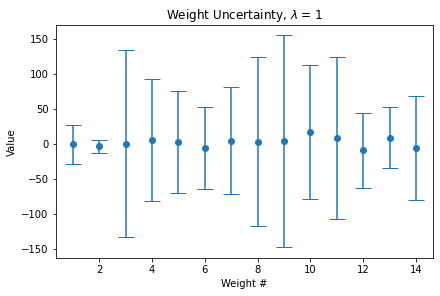

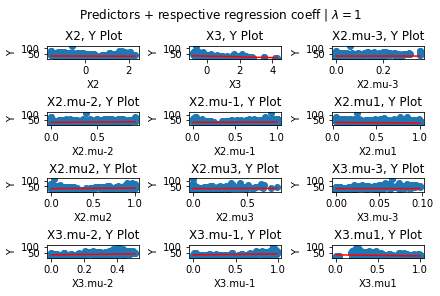

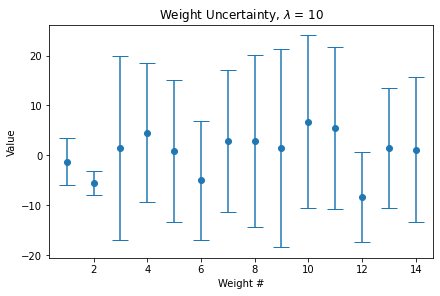

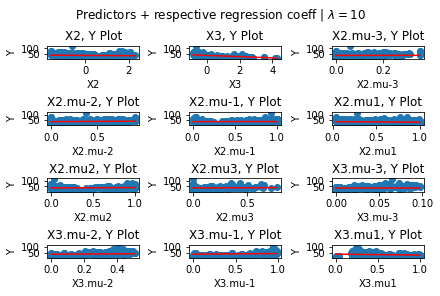

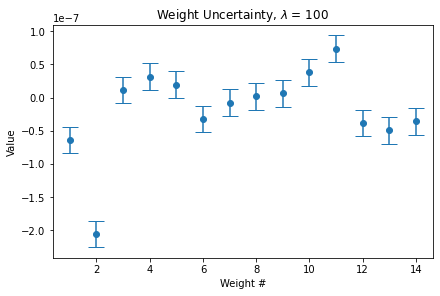

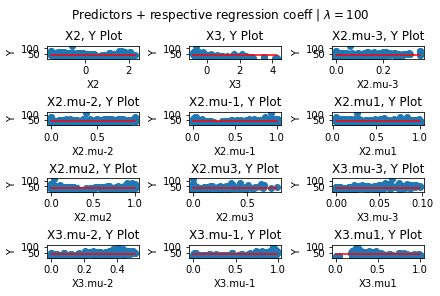

In [336]:
# 4. Standardization + Gaussian Basis
standardized_pred = preprocessing.StandardScaler().fit_transform(dfr[["X2", "X3"]])
standardized_pred = pd.DataFrame(standardized_pred, columns=["X2", "X3"])
gauss = lambda x_i, mu: np.exp(-0.5 * (x_i - mu) ** 2)

mu = [-3, -2, -1, 1, 2, 3]

stan_1 = bay_ridge(standardized_pred, dfr["Y"], lambda_reg=1, basis=gauss, basis_params=mu)
stan_2 = bay_ridge(standardized_pred, dfr["Y"], lambda_reg=10, basis=gauss, basis_params=mu)
stan_3 = bay_ridge(standardized_pred, dfr["Y"], lambda_reg=100, basis=gauss, basis_params=mu)

In [ ]:
# 5. Compare linear regression model, gaussian basis model
BayesianRidge().fit(X=predictors, y=dfr["Y"])

In [299]:
# 6. Cross Validation
from sklearn.metrics import make_scorer

rmse = make_scorer(mean_squared_error)
print(cross_val_score(bay_1, X=predictors, y=dfr["Y"], cv=10, scoring=rmse))
print(cross_val_score(bay_2, X=predictors, y=dfr["Y"], cv=10, scoring=rmse))
print(cross_val_score(bay_3, X=predictors, y=dfr["Y"], cv=10, scoring=rmse))

print(cross_val_score(stan_1, X=standardized_pred, y=dfr["Y"], cv=10, scoring=rmse))
print(cross_val_score(stan_2, X=standardized_pred, y=dfr["Y"], cv=10, scoring=rmse))
print(cross_val_score(stan_3, X=standardized_pred, y=dfr["Y"], cv=10, scoring=rmse))


[ 63.89114084  56.89993407  98.38583199  94.33255073  36.11357478
  83.65535406 213.3551035   82.54990061  59.33830889  64.5932842 ]
[ 77.88860063  87.40388346 124.81751986  99.90442721  54.60008824
 102.32613294 222.84041319 107.13168165  59.16076487  81.85398287]
[159.2164679  180.81317535 212.84521591 168.61501452 144.33281553
 176.98253728 281.3658193  186.24846372 116.48008443 169.07217252]
[ 68.87284554  69.19693126 110.71281546  96.49990031  46.60044329
 104.61997928 210.19846791 101.07330672  65.72946081  74.38563569]
[ 68.54828677  71.12478252 110.89243952  97.23924919  47.08919486
 103.89155106 210.71163211 101.91304775  64.47974023  75.90370003]
[165.46161974 187.04141041 219.67453442 173.68079031 150.93929919
 183.30308791 285.77624639 192.15005657 121.26635377 174.9351637 ]


### **Classification Problem (25 pts)** 

In [7]:
# Dataset Init
dfc = pd.read_excel("ENB2012_data.xlsx")
dfc["Y1-Y2"] = np.where(dfc["Y1"] - dfc["Y2"] > 0, 1, 0)
dfc.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Y1-Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,0


C:\Users\SAADMU~1\AppData\Local\Temp/ipykernel_28320/1939464138.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dfc[dfc["Y1-Y2"] == 0].drop(excl_hist, axis=1).hist(bins="auto", ax=ax_hist_0)
C:\Users\SAADMU~1\AppData\Local\Temp/ipykernel_28320/1939464138.py:13: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dfc[dfc["Y1-Y2"] == 1].drop(excl_hist, axis=1).hist(bins="auto", ax=ax_hist_1)


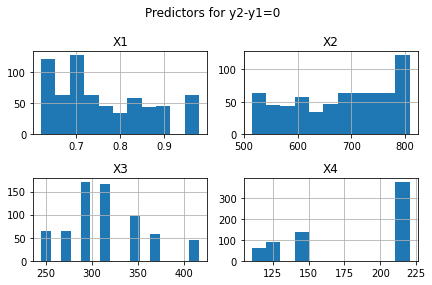

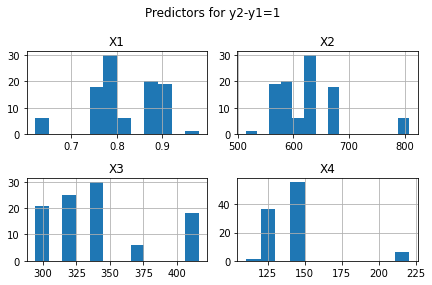

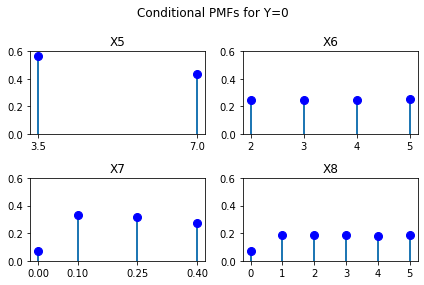

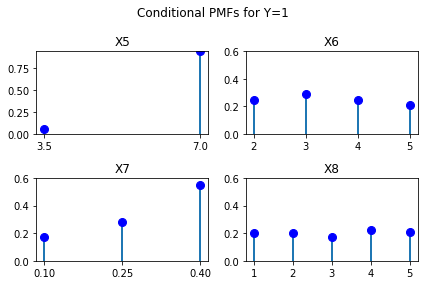

In [8]:
# 1. Visualization

excl_hist = ["Y1", "Y2", "Y1-Y2", "X5", "X6", "X7", "X8"]

# Histogram of predictors X1, X2, X3, X4 that have label 0
fig_hist_0, ax_hist_0 = plt.subplots()
dfc[dfc["Y1-Y2"] == 0].drop(excl_hist, axis=1).hist(bins="auto", ax=ax_hist_0)
fig_hist_0.suptitle("Predictors for y2-y1=0")
fig_hist_0.tight_layout()

# Histogram of predictors X1, X2, X3, X4 that have label 1
fig_hist_1, ax_hist_1 = plt.subplots()
dfc[dfc["Y1-Y2"] == 1].drop(excl_hist, axis=1).hist(bins="auto", ax=ax_hist_1)
fig_hist_1.suptitle("Predictors for y2-y1=1") 
fig_hist_1.tight_layout()

# Construct conditional PMFs 
x_discrete = ["X5", "X6", "X7", "X8"]

# P(Xn | Y=0)
fig_pmf_0, ax_pmf_0 = plt.subplots(2, 2)
for i in range(len(x_discrete)):
    data = dfc[dfc["Y1-Y2"] == 0][x_discrete[i]]
    data = data.value_counts().sort_index()
    data = data.divide(sum(data.values))
    # print(data)
    x = data.index
    p = data.values
    ax_pmf_0[lin_to_mat(2, i)].plot(x, p, "bo", ms=8, mec="b")
    ax_pmf_0[lin_to_mat(2, i)].vlines(x, 0, p, linestyles="-", lw=2)
    ax_pmf_0[lin_to_mat(2, i)].set_title(x_discrete[i])
    ax_pmf_0[lin_to_mat(2, i)].set_ylim([0, 0.6])
    ax_pmf_0[lin_to_mat(2, i)].set_xticks(x)
fig_pmf_0.suptitle("Conditional PMFs for Y=0")

fig_pmf_0.tight_layout()


# P(Xn | Y=1)
fig_pmf_1, ax_pmf_1 = plt.subplots(2, 2)
for i in range(len(x_discrete)):
    data = dfc[dfc["Y1-Y2"] == 1][x_discrete[i]]
    data = data.value_counts().sort_index()
    data = data.divide(sum(data.values))
    # print(data)
    x = data.index
    p = data.values
    ax_pmf_1[lin_to_mat(2, i)].plot(x, p, "bo", ms=8, mec="b")
    ax_pmf_1[lin_to_mat(2, i)].vlines(x, 0, p, linestyles="-", lw=2)
    ax_pmf_1[lin_to_mat(2, i)].set_title(x_discrete[i])
    ax_pmf_1[lin_to_mat(2, i)].set_ylim([0, max(0.6, max(p))])
    ax_pmf_1[lin_to_mat(2, i)].set_xticks(x)
fig_pmf_1.suptitle("Conditional PMFs for Y=1")
fig_pmf_1.tight_layout()

_="""
X5 and X7 appear to be very good predictors of the class labels, looking at their conditional distributions. 
"""

In [66]:
# 2. Logistic Regression
pred_c_names = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]
pred_c_data = dfc[pred_c_names]
logistic_model = LogisticRegression(max_iter=500).fit(X=pred_c_data, y=dfc["Y1-Y2"])

prob_preds = logistic_model.predict_proba(X=pred_c_data)[:,1]
show_weights(pred_c_names, logistic_model.coef_[0])

# Assuming Y=1 is "positive", Y=0 is "negative"
preds = logistic_model.predict(pred_c_data)
preds_df = pd.DataFrame(preds.transpose(), columns=["preds"])
true_pos = len(dfc[(dfc["Y1-Y2"] == 1) & (preds_df["preds"] == 1)])

print("\nAccuracy\nRecall: ", true_pos / len([i for i in preds if i == 1]))
print("Precision: ", true_pos / len(dfc[dfc[pred_c_names] == 1]))
print("Model score:", logistic_model.score(X=pred_c_data, y=dfc["Y1-Y2"]))

X1 weight: 0.1314098373909968
X2 weight: 0.01376272663718662
X3 weight: -0.0019824349199593157
X4 weight: 0.007872580757269867
X5 weight: 1.6519035109073805
X6 weight: -0.08958701981032652
X7 weight: 3.1448815458541177
X8 weight: 0.08805294156710261

Accuracy
Recall:  0.5833333333333334
Precision:  0.009114583333333334
Model score: 0.8723958333333334


Text(0.5, 0, 'Threshold')

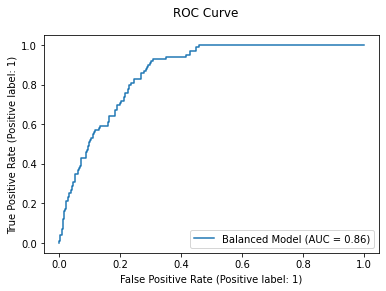

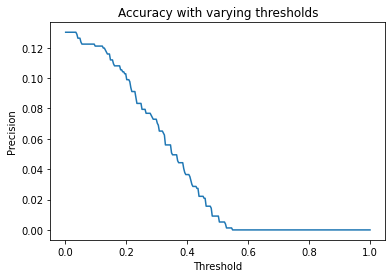

In [75]:
# 3. ROC Curve
fig_roc, ax_roc = plt.subplots()
fig_roc.suptitle("ROC Curve")
RocCurveDisplay.from_predictions(y_true=dfc["Y1-Y2"], y_pred=prob_preds, ax=ax_roc, name="Balanced Model")

fig_thresh, ax_thresh = plt.subplots()

threshs = np.linspace(0.001, 1, 300)
prec_data = []
for thresh in threshs:
    preds_df["thresh"] = [1 if i > thresh else 0 for i in prob_preds]
    true_pos = len(dfc[(dfc["Y1-Y2"] == 1) & (preds_df["thresh"] == 1)])
    prec_data.append(true_pos / len(dfc[dfc[pred_c_names] == 1]))


len(dfc[(dfc["Y1-Y2"] == 1) & (preds_df["preds"] == 1)])
ax_thresh.plot(threshs, prec_data) 
ax_thresh.set_title("Accuracy with varying thresholds")
ax_thresh.set_ylabel("Precision")
ax_thresh.set_xlabel("Threshold")

In [324]:
# 4. Bayesian Regression
def bay_logistic(alpha):
    model = BernoulliNB(alpha=alpha, fit_prior=True)
    model.fit(X=pred_c_data, y=dfc["Y1-Y2"])
    model.predict_proba(pred_c_data)
    weights = model.coef_
    print("Weights", weights)
    # print("Weight uncertainties", )
    return model, weights


a_1, w1 = bay_logistic(0.1)
a_2, w2 = bay_logistic(1)
a_3, w3 = bay_logistic(10)
a_4, w4 = bay_logistic(100)

Weights [[-0.0009985 -0.0009985 -0.0009985 -0.0009985 -0.0009985 -0.0009985
  -0.0009985 -0.0009985]]
Weights [[-0.0098523 -0.0098523 -0.0098523 -0.0098523 -0.0098523 -0.0098523
  -0.0098523 -0.0098523]]
Weights [[-0.08701138 -0.08701138 -0.08701138 -0.08701138 -0.08701138 -0.08701138
  -0.08701138 -0.08701138]]
Weights [[-0.40546511 -0.40546511 -0.40546511 -0.40546511 -0.40546511 -0.40546511
  -0.40546511 -0.40546511]]


C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [325]:
# 5. Cross validation
print(cross_val_score(estimator=a_1, X=pred_c_data, y=dfc["Y1-Y2"], cv=10))
print(cross_val_score(estimator=a_2, X=pred_c_data, y=dfc["Y1-Y2"], cv=10))
print(cross_val_score(estimator=a_3, X=pred_c_data, y=dfc["Y1-Y2"], cv=10))
print(cross_val_score(estimator=a_4, X=pred_c_data, y=dfc["Y1-Y2"], cv=10))

_="""
The model accuracy does not appear to change with varying values of alpha
"""

[0.24675325 0.87012987 0.87012987 0.87012987 0.87012987 0.87012987
 0.87012987 0.87012987 0.86842105 0.86842105]
[0.24675325 0.87012987 0.87012987 0.87012987 0.87012987 0.87012987
 0.87012987 0.87012987 0.86842105 0.86842105]
[0.24675325 0.87012987 0.87012987 0.87012987 0.87012987 0.87012987
 0.87012987 0.87012987 0.86842105 0.86842105]
[0.87012987 0.87012987 0.87012987 0.87012987 0.87012987 0.87012987
 0.87012987 0.87012987 0.86842105 0.86842105]


In [327]:
# 6.

x1=np.array([0.8,600.0,286.0,138.1,5,4,0.25,0]).reshape((1, 8))
x2=np.array([0.67,630.0,296.0,238.1,2,6,0.5,3]).reshape((1, 8))

for w in [w1, w2, w3, w4]:
    print((w * x1 + w * x2) / 2)
    # print(m.predict_proba(x2))

[[-7.33899212e-04 -6.14078933e-01 -2.90564178e-01 -1.87818288e-01
  -3.49475815e-03 -4.99251165e-03 -3.74438374e-04 -1.49775349e-03]]
[[-7.24143789e-03 -6.05916231e+00 -2.86701826e+00 -1.85321696e+00
  -3.44830376e-02 -4.92614822e-02 -3.69461117e-03 -1.47784447e-02]]
[[-6.39533621e-02 -5.35119968e+01 -2.53203107e+01 -1.63668400e+01
  -3.04539819e-01 -4.35056885e-01 -3.26292664e-02 -1.30517065e-01]]
[[-2.98016854e-01 -2.49361041e+02 -1.17990346e+02 -7.62679868e+01
  -1.41912788e+00 -2.02732554e+00 -1.52049416e-01 -6.08197662e-01]]
